In [1]:
library(tidyverse)
library(tidymodels)
library(cowplot)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Data Description 
## Observations and Variables
As shown in the tables below we can see that:

In the player dataset, there are **196** observations, and **7** variables:
- **experience**<chr>: The level of experience of the player.
- **subscribe**<lgl>: Whether the player is subscribed is represented in the type boolean.
- **hashedEmail**<chr>: The hashed email of the player.
- **played_hours**<dbl>:The number of hours played is represented in the type double.
- **name**<chr>: The name of the player.
- **gender**<chr>: The gender of the player.
- **Age**<dbl>: The age of the player.

In the sessions dataset, there are **1535** observations, and **5** variables:
- **hasedEmail**<chr>: the encrypted email of the player.
- **start_time**<chr>: the start time of the session.
- **end_time<chr>**:The end time of the session.
- **original_start_time**<dbl>: The time passed since the start of the project when the session started.
- **original_end_time**<dbl>: The time passed since the start of the project when the session ended.
 
## summary statistics
In the **player** dataset we can see that:
- **Mean age**: 20.52062
- **Max age**: 50
- **Min age**: 8
- **Mean played hours**: 5.845918
- **Max played hours**: 223.1
- **Min played hours**: 0

## Issues
- Start time and end_time in the sessions dataset have the year, month, date, and hours in one variable.
- The original_start_time and original_end_time are in a very small unkown unit.
- The name of variable Age and hashedEmail is in a different format then the other variables in the player dataset.
- There might be NA values in the dataset.

In [2]:
players <- read_csv("https://raw.githubusercontent.com/AndyHuang36888/GroupProjectDSCI100/refs/heads/main/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/AndyHuang36888/GroupProjectDSCI100/refs/heads/main/sessions.csv")


# tidy data
colnames(players) <-c("experience", "subscribe", "hashed_email", "played_hours", "name", "gender","age")
colnames(sessions) <-c("hashed_email", "start_time", "end_time", "original_start_time","original_end_time")

players_stats <- players|>
                 select(age, played_hours)

players_mean <- map_df(players_stats, mean, na.rm = TRUE)            
players_max <- map_df(players_stats, max, na.rm = TRUE)
players_min <- map_df(players_stats, min, na.rm = TRUE)
players_summary <- bind_cols(players_mean, players_max) |>
                   bind_cols(players_min)
colnames(players_summary) <- c("mean_age", "mean_played_hours", "max_age", "max_played_hours", "min_age", "min_played_hours")
players_summary
head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `age` -> `age...1`
• `played_hours` -> `played_hours...2`
• `age` -> `age...3`
• `played_hours` -> `played_hours...4`
New names:
• `age` -> `age...5`
• `played_hours` -> `played_hours...6`


mean_age,mean_played_hours,max_age,max_played_hours,min_age,min_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.52062,5.845918,50,223.1,8,0


experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashed_email,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


# Questions
Can the variables played_hours, age, and experience predict who has subscribed to a game letter in the player's data set? 

The players hours played, age, and level of experience could be predictive of the player's tendency to subscribe to a game's newsletter. I can use K-nearest-neighbours to build a model that can try to predict if the player is subscribed to a game newsletter with these variables.
Among these variables, the player's experience is the type string, I will need to convert it to a numeric value if I want to use it as a predictor.

# Visualization
Below are some visualizations of the data and the relationship of selected predictors.

Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 10 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


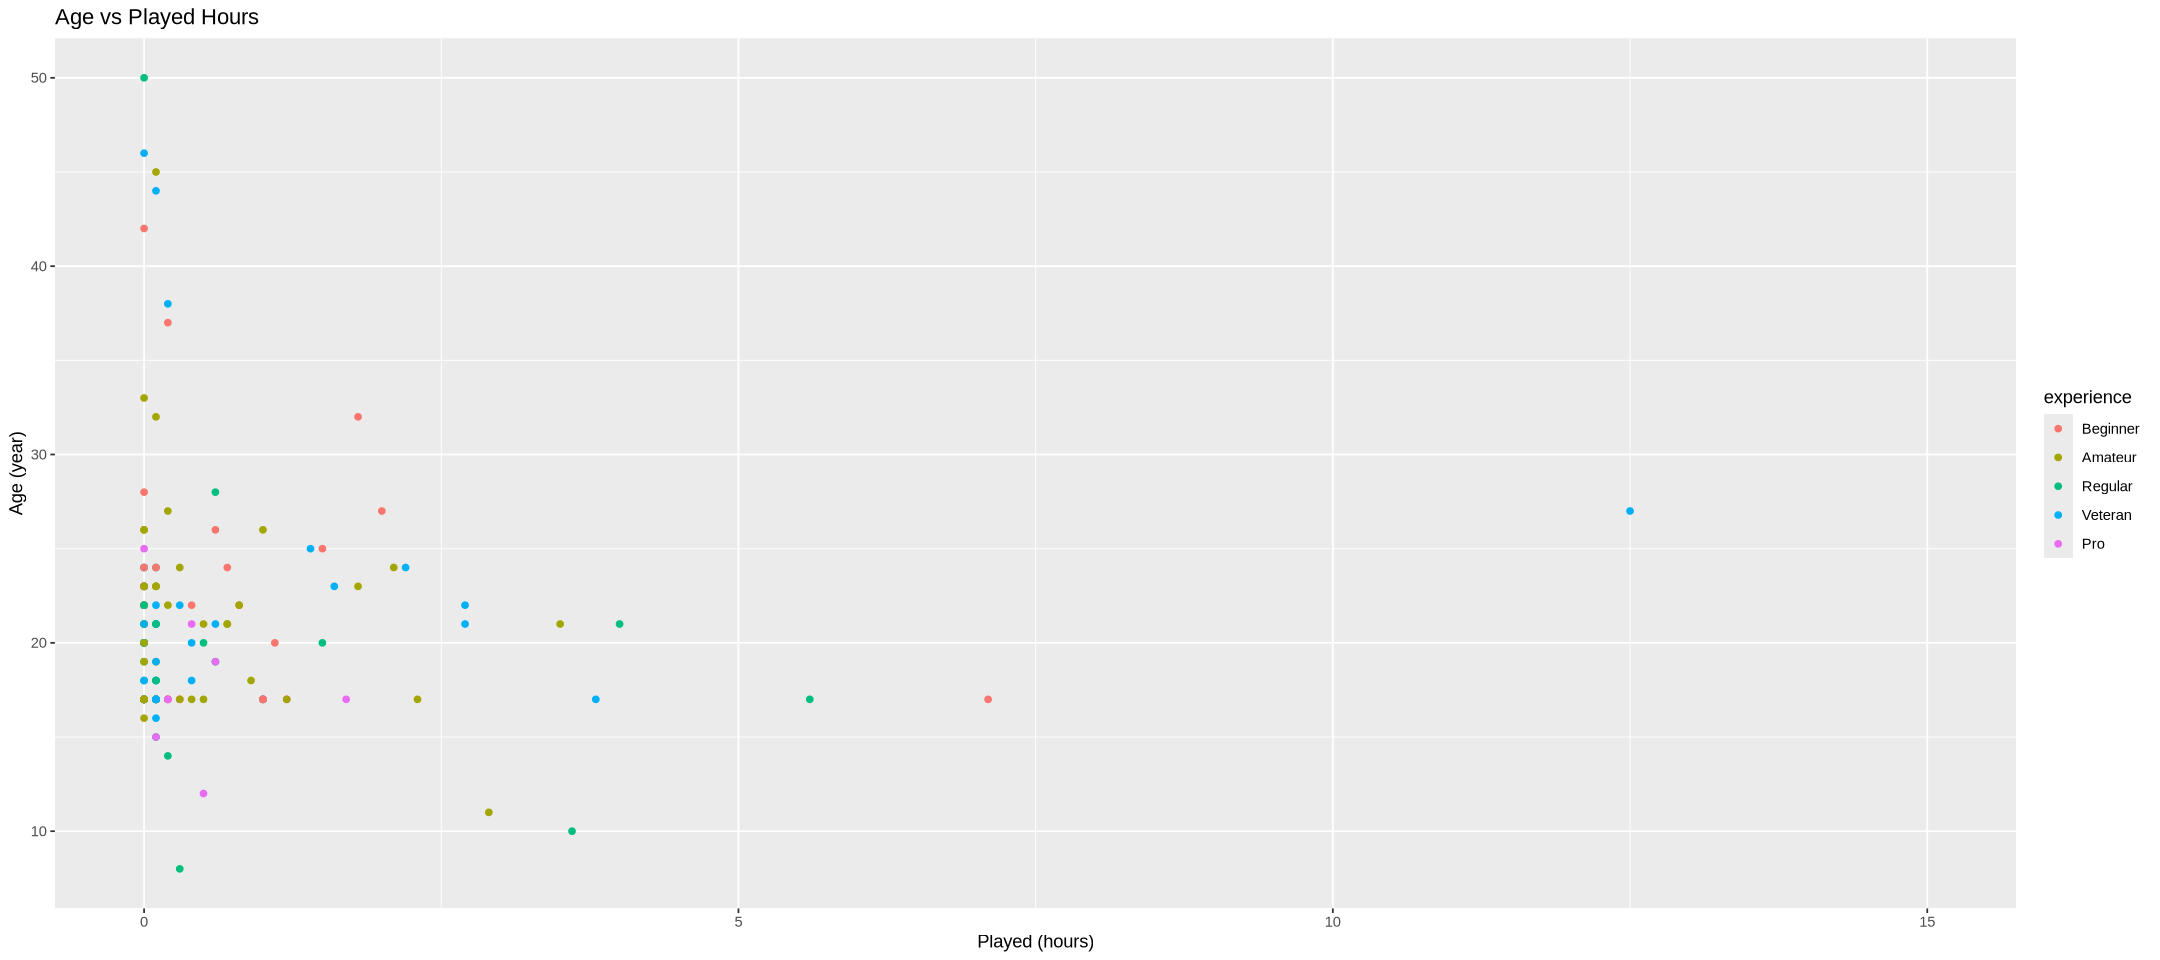

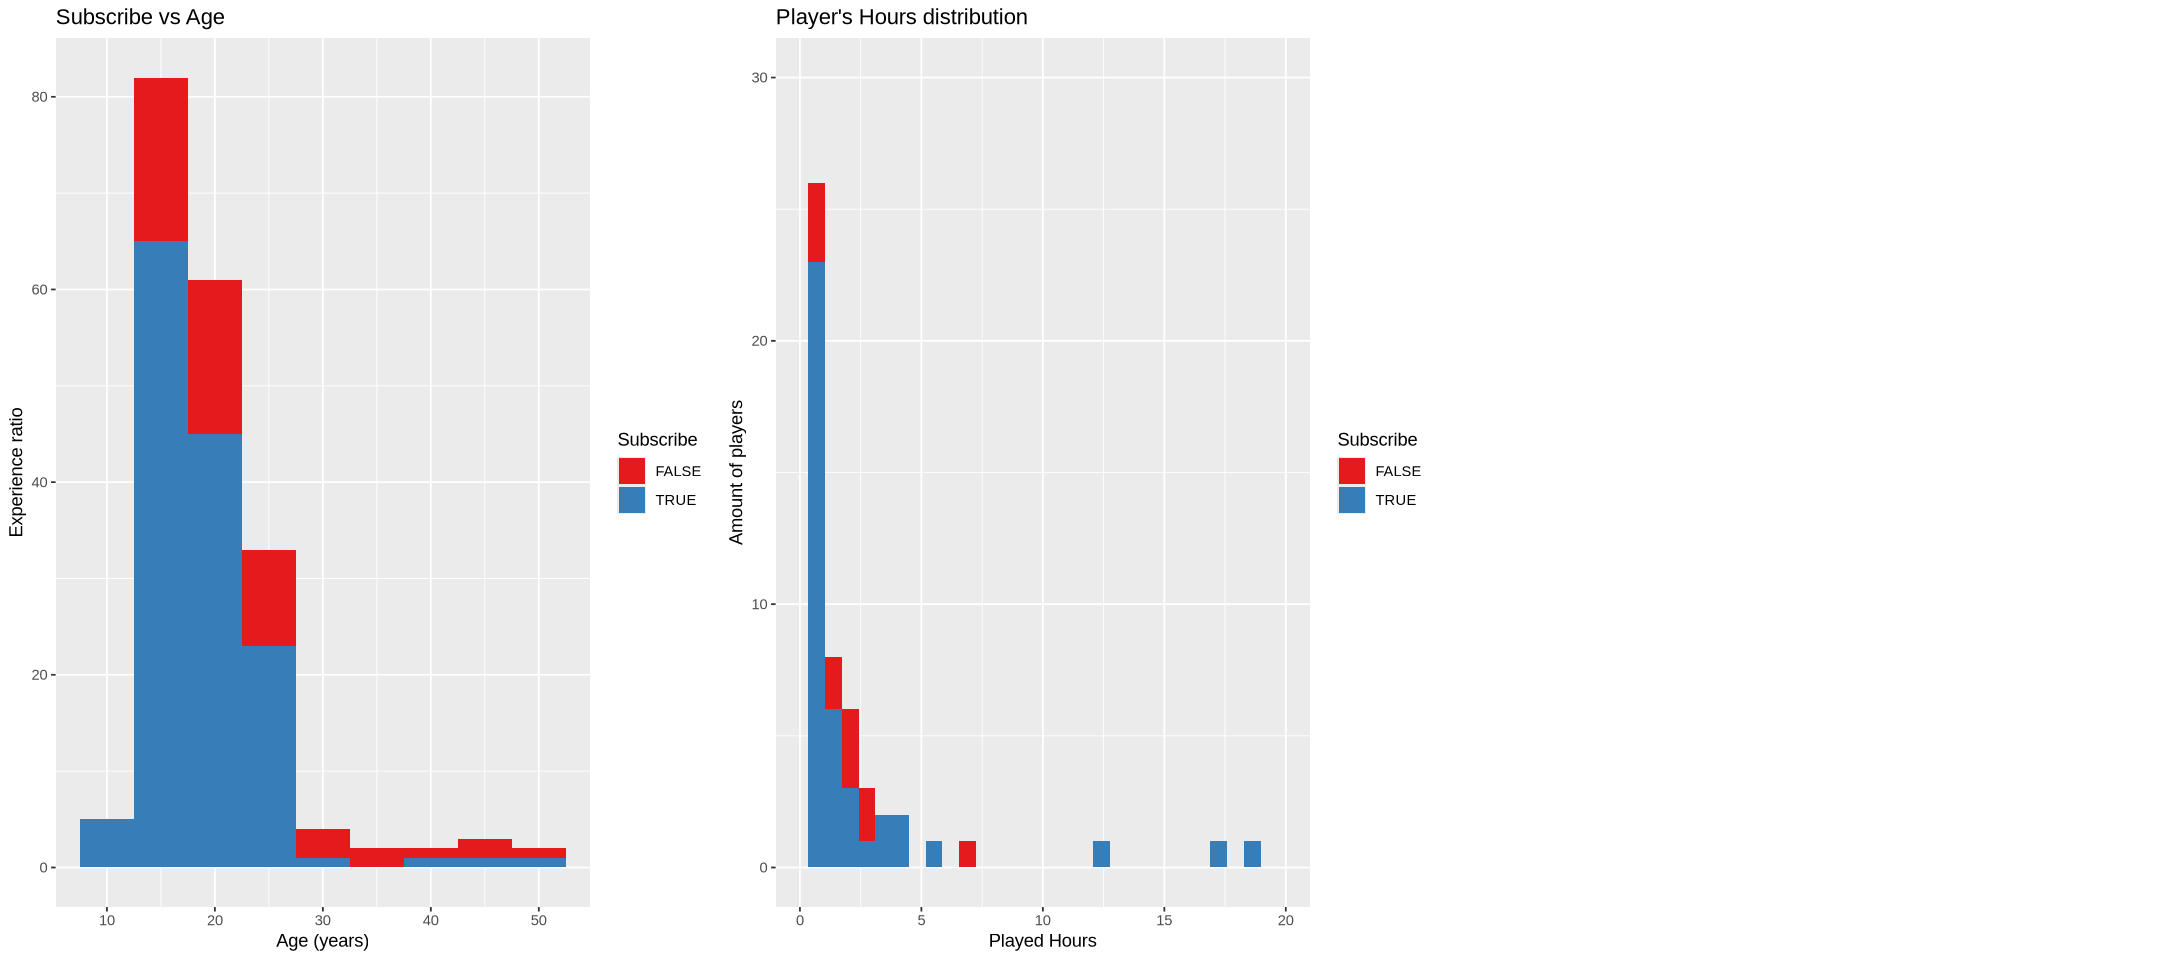

In [3]:
options(repr.plot.width = 18, repr.plot.height = 8) 

players_point <- players |>
                 mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))) |>
                 ggplot(aes(x = played_hours, y = age, color = experience)) +
                 geom_point() +  
                 xlim(0, 15) +
                 scale_fill_brewer(palette = "Set1") +
                 labs(title = "Age vs Played Hours",
                 x = "Played (hours)",
                 y = "Age (year)",
                 fill = "Experience")


players_age <-   players |>
                 arrange(age) |>
                 mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))) |>
                 ggplot(aes(x = age, fill = subscribe)) +
                 geom_histogram(binwidth =5) +  
                 scale_fill_brewer(palette = "Set1") +
                 labs(title = "Subscribe vs Age",
                 x = "Age (years)",
                 y = "Experience ratio",
                 fill = "Subscribe")
                 
players_hours <- players |>
                 mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))) |>
                 ggplot(aes(x = played_hours, fill = subscribe)) +
                 geom_histogram() + 
                 xlim(0, 20) +
                 ylim(0, 30) +
                 scale_fill_brewer(palette = "Set1") +
                 labs(title = "Player's Hours distribution",
                 x = "Played Hours",
                 y = "Amount of players",
                 fill = "Subscribe")
players_point
plot_grid(players_age, players_hours, ncol = 3)


From the graphs, we can see that there are not a lot of players that play more than 10 hours. This has cause a huge empty gap in the last graph. We can also see that the majority of the players are between the age of 10 to 25 years old.

There are also a lot more amateur players than pro players, and that could skew the data when doing the classification. There are also more subscribed players than unsubscribed players, which could also cause the model to predict that the player is subscribed more often.

# Methods and Plan
I can use k-nearest-neighbours classification to predict the player's experience, since subscribe is a categorical variable.
It is assumed that players in the same class have the similar stats and appear in the same general area of the graph.
One potential issue is that I might not be using enough predictors, or the predictors chosen are not correlated to the player's experience.


The data is going to be split into two sets, with 75% as the training set and 25% as the testing set. The training data will be spilt into 5 more sets, so the model can be trained with cross validation. 
I am going to compare the metrics of the models with different k values and select the one with the best accuracy.


In [4]:
set.seed(2345)
# clean data
players_clean <- players |>
select(age, played_hours, subscribe) |>
mutate(subscribe = as.factor(subscribe))
# split
players_split <- initial_split(players_clean, prop = 0.75, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

players_vfold = vfold_cv(players_training, v = 5, strata = subscribe)

In [5]:
players_recipe <- recipe(subscribe ~ . , data = players_training) |>
                       step_scale(all_predictors()) |>
                       step_center(all_predictors())

players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

player_workflow_tune <- workflow() |>
add_recipe(players_recipe) |>
add_model(players_tune)


In [6]:
# find best k
gridvals <- tibble(neighbors = seq(from = 1, to = 31, by = 5))

# compare data
players_tune <- player_workflow_tune |>
tune_grid(resamples = players_vfold, grid = gridvals)

# select best accuracy
tune_accuracy <- collect_metrics(players_tune) |>
filter(.metric == "accuracy") 


→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





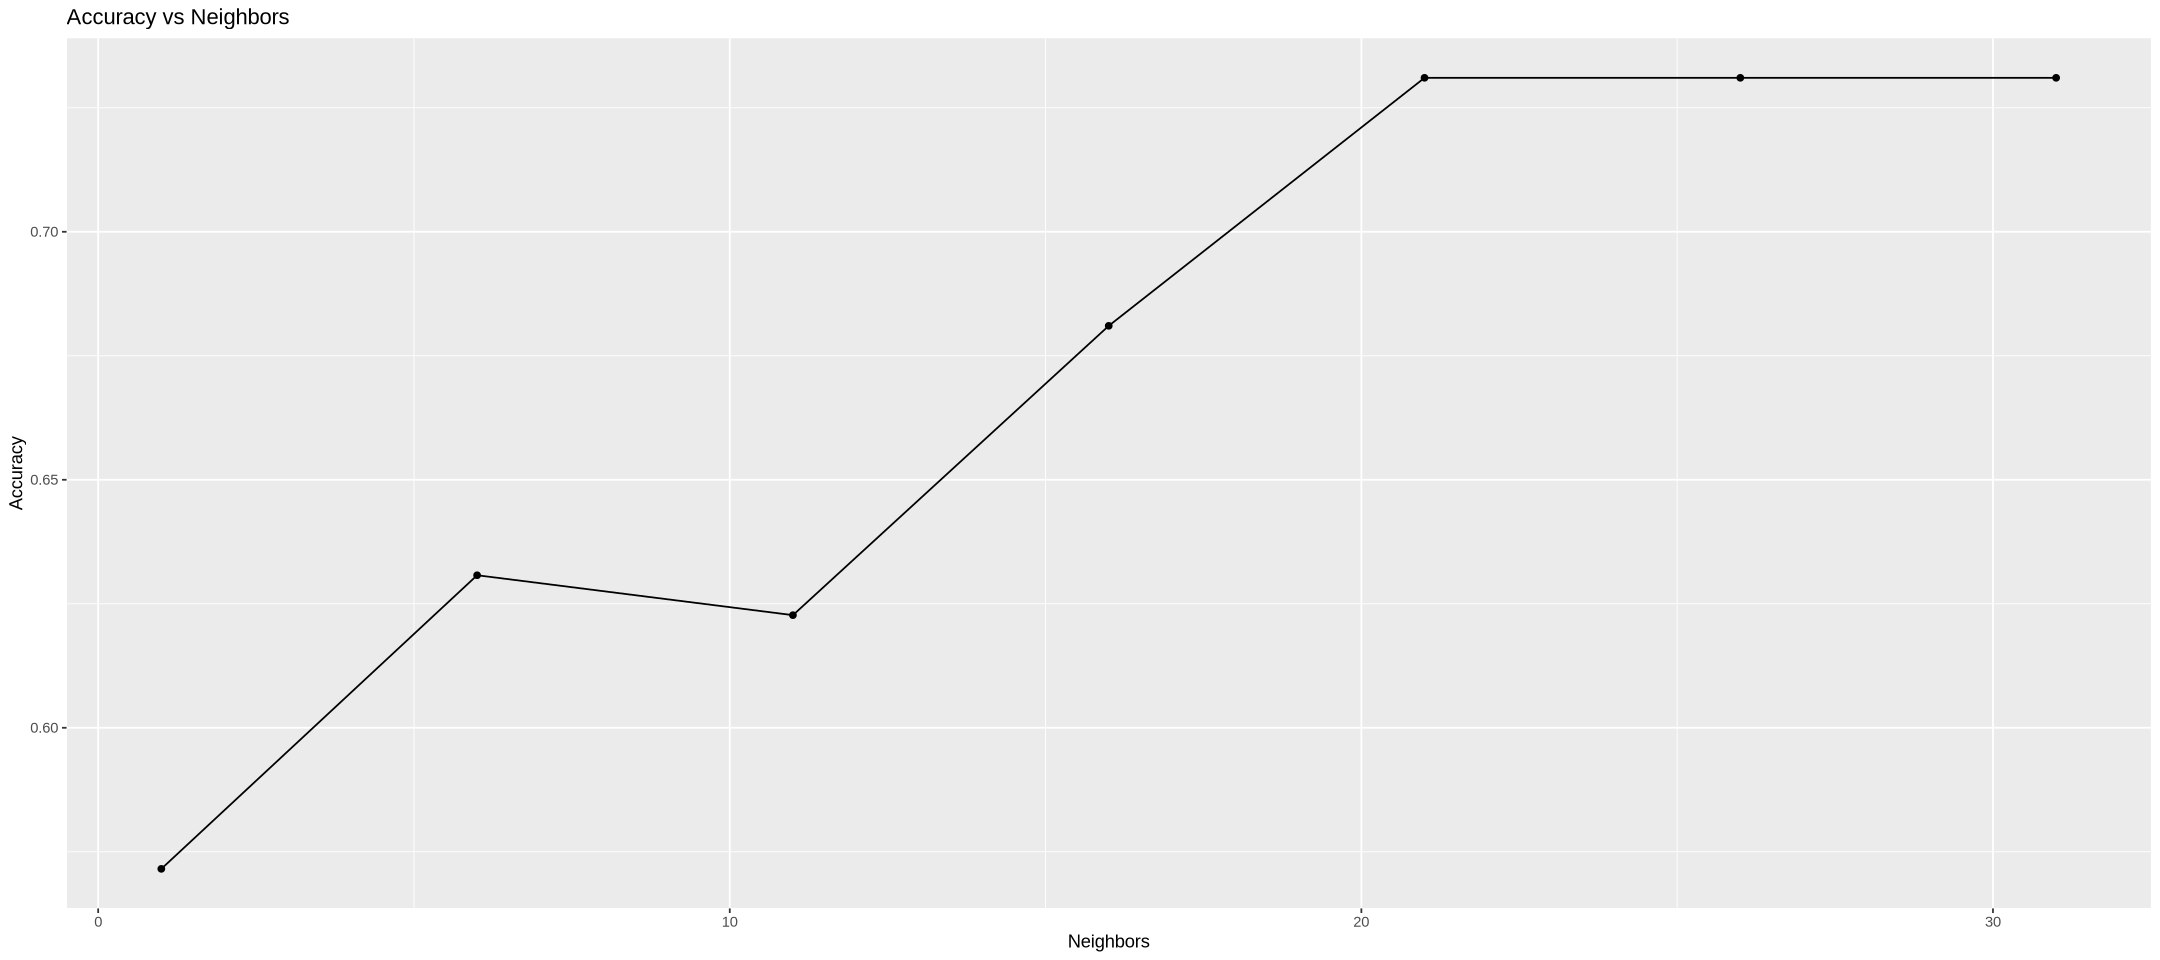

In [7]:
# visualization
accuracy_vs_k <- ggplot(tune_accuracy, aes(x = neighbors, y = mean))+
geom_point() +
geom_line() +
labs(x = "Neighbors",
     y = "Accuracy") +
ggtitle("Accuracy vs Neighbors")
accuracy_vs_k

In [8]:
# select best
best_k <- tune_accuracy |>
arrange(desc(mean))  |>
select(neighbors) |>
slice(1) |>
pull()

In [9]:
# best k classification
players_model <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
set_engine("kknn") |>
set_mode("classification")

player_workflow_best <- workflow() |>
add_recipe(players_recipe) |>
add_model(players_model)

In [ ]:
# test classification model 
player_fit <- fit_resamples(player_workflow_best, players_vfold)
player_prediction <- player_fit |>
          predict(players_testing) |>
          bind_cols(players_testing) 

prediction_plot <-player_prediction|>
ggplot(aes(x =age, y =played_hours, color = .pred_class, shape = subscribe)) +
geom_point()+
labs(x = "Age (year)",
     y = "Played Hours",
    color = "Predicted Subscription",
    shapre = "Actual Subscription") 
prediction_plot

conf_mat(player_prediction, truth = subscribe, estimate = .pred_class)

player_summary <- player_prediction |>
metrics(truth = subscribe, estimate = .pred_class)
player_summary